# Imports and Twitter Keys

In [1]:
import os
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

from wordcloud import WordCloud
import re
from textblob import TextBlob
import networkx

os.chdir('/Users/drewharrison/Desktop/Playlists/')

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

consumer_key= 'pqV3PB89bw5nnW0rHIkoH5rIQ'
consumer_secret= 'bi1Zom2G3Q027KnuCbPLoVRCQ3ou6vhtnnq2MK1GNLlBEM224D'
access_token= '29135802-4eDcwLHhgt5xHZ3fO6PoOwNpl5Inks8K4vdqaDl5c'
access_token_secret= 'wBCLKa0n4rkllnGKv1mvBuYzDSvDhz36G2xKrTeGQfHDk'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Searching For Keywords

In [2]:
# Define the search term and the date_since date as variables
search_words = "flume"
new_search = search_words + " -filter:retweets"
date_since = "2020-03-11"

# Collect tweets
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items()

all_tweets = [[tweet.user.screen_name, tweet.user.location, tweet.user.verified, tweet.user.followers_count, tweet.text] for tweet in tweets]

tweet_df = pd.DataFrame(data=all_tweets, columns=['user', 'location', 'verified', 'followers', 'content'])
tweet_df

,user,location,verified,followers,content
0,Paneer_Papi,Cambridge x Manchester,False,1494,Took you an hour to come up with that response...
1,robertniles,"Los Angeles, CA",True,2218,I'm back with another episode of my theme park...
2,sc5tt,,False,613,If flume isn’t at roo in sept then what are we...
3,ThemePark,"Los Angeles, CA",False,47736,Time for another episode of Theme Park Insider...
4,siIkspun,,False,564,don’t understand how this song exists like we ...
...,...,...,...,...,...
2590,alexherrerv,,False,493,Maybe I will see flume now 😳
2591,nosciencehere,mpls,False,514,Flume is doing a 3 day concert series where ea...
2592,katwoman08,"Ontario, Canada",False,45,@WDWNT That’s what happens when you refurb it ...
2593,jaimeowww,"St Petersburg, FL",False,27,"alright spotify, you’re usually on point but w..."


In [3]:
content = tweet_df.iloc[:,4]
content

0       Took you an hour to come up with that response...
1       I'm back with another episode of my theme park...
2       If flume isn’t at roo in sept then what are we...
3       Time for another episode of Theme Park Insider...
4       don’t understand how this song exists like we ...
                              ...                        
2590                         Maybe I will see flume now 😳
2591    Flume is doing a 3 day concert series where ea...
2592    @WDWNT That’s what happens when you refurb it ...
2593    alright spotify, you’re usually on point but w...
2594    #NowPlaying Flume;Vera Blue - Rushing Back htt...
Name: content, Length: 2595, dtype: object

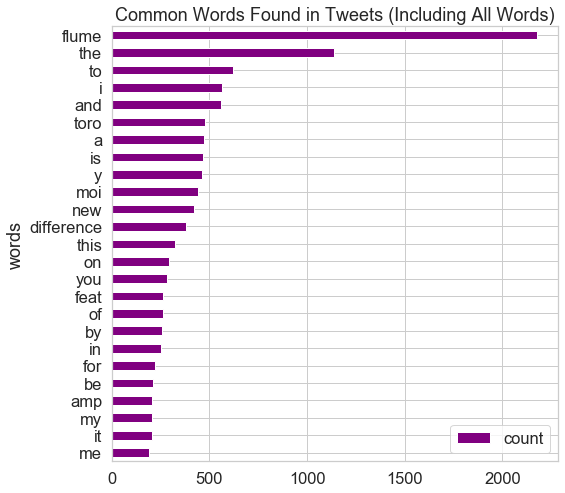

In [4]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

all_tweets_no_urls = [remove_url(tweet) for tweet in content]
all_tweets_no_urls

all_tweets_no_urls[0].lower().split()
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

# # List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# # Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(25)

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(25),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

fig, ax = plt.subplots(figsize=(8, 8))

# # Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [59]:
# # Collect a list of tweets
# [tweet.text for tweet in tweets]

# all_tweets = [tweet.text for tweet in tweets]

[]

In [46]:
len(all_tweets)

222

In [5]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df

,polarity,tweet
0,0.000000,Took you an hour to come up with that response...
1,0.000000,Im back with another episode of my theme park ...
2,0.000000,If flume isnt at roo in sept then what are we ...
3,0.033333,Time for another episode of Theme Park Insider...
4,0.333333,dont understand how this song exists like we d...
...,...,...
2590,0.000000,Maybe I will see flume now
2591,-0.062500,Flume is doing a 3 day concert series where ea...
2592,0.450000,WDWNT Thats what happens when you refurb it in...
2593,-0.250000,alright spotify youre usually on point but wha...


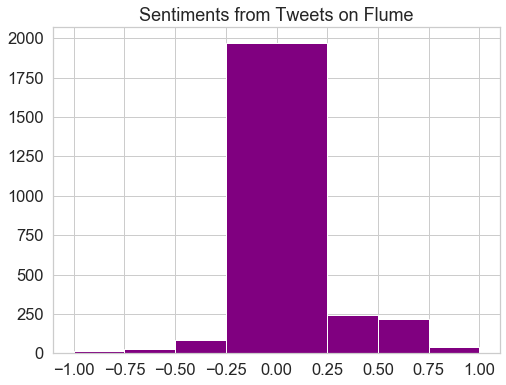

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Flume")
plt.show()

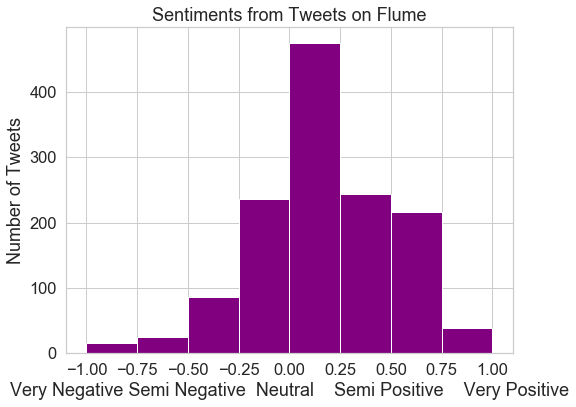

In [7]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")
ax.set(xlabel='Very Negative Semi Negative  Neutral    Semi Positive    Very Positive',
       ylabel='Number of Tweets')

plt.title("Sentiments from Tweets on Flume")
plt.show()

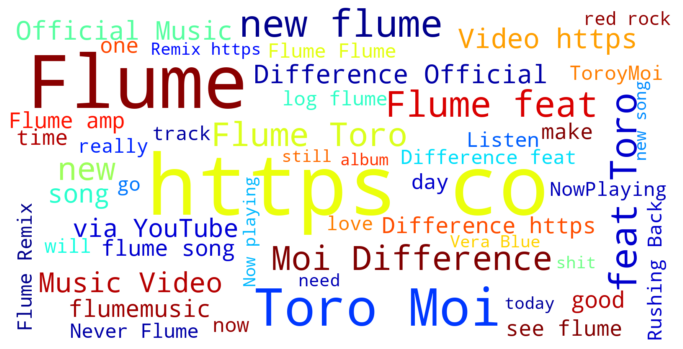

In [8]:
# making word cloud of common words in tweets 

def word_cloud(wd_list):
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
    
word_cloud(content)

In [9]:
tweet_df['polarity'] = sentiment_df.iloc[:,0]
tweet_df

,user,location,verified,followers,content,polarity
0,Paneer_Papi,Cambridge x Manchester,False,1494,Took you an hour to come up with that response...,NaN
1,robertniles,"Los Angeles, CA",True,2218,I'm back with another episode of my theme park...,NaN
2,sc5tt,,False,613,If flume isn’t at roo in sept then what are we...,NaN
3,ThemePark,"Los Angeles, CA",False,47736,Time for another episode of Theme Park Insider...,0.033333
4,siIkspun,,False,564,don’t understand how this song exists like we ...,0.333333
...,...,...,...,...,...,...
2590,alexherrerv,,False,493,Maybe I will see flume now 😳,NaN
2591,nosciencehere,mpls,False,514,Flume is doing a 3 day concert series where ea...,-0.062500
2592,katwoman08,"Ontario, Canada",False,45,@WDWNT That’s what happens when you refurb it ...,0.450000
2593,jaimeowww,"St Petersburg, FL",False,27,"alright spotify, you’re usually on point but w...",-0.250000


In [12]:
with open('Flume_Tweets_The_Difference_week.csv', 'a') as f:
    tweet_df.to_csv(f, header=True, index=False, encoding='utf-8-sig')